In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np


In [2]:
df = pd.read_csv('ksprojects.csv', encoding="ISO-8859-1")

In [3]:
df.head()

,KsID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09/10/2015,1000.0,11/08/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01/11/2017,30000.0,02/09/2017 4:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26/02/2013,45000.0,12/01/2013 0:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16/04/2012,5000.0,17/03/2012 3:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29/08/2015,19500.0,04/07/2015 8:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
# the size of the dataset
df.shape

(378661, 15)

In [5]:
# the type of each column
df.dtypes

KsID                  int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [6]:
df.isnull().sum()

KsID                   0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [7]:
# drop the rows without the name
df.dropna(subset=['name'],how='any',inplace=True)

In [8]:
df.isnull().sum()

KsID                   0
name                   0
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

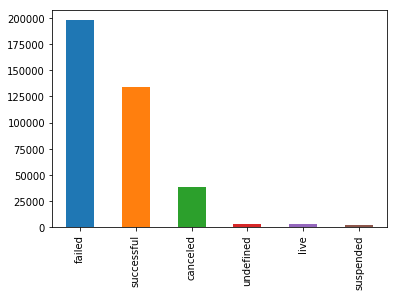

In [9]:
df['state'].value_counts().plot(kind='bar')

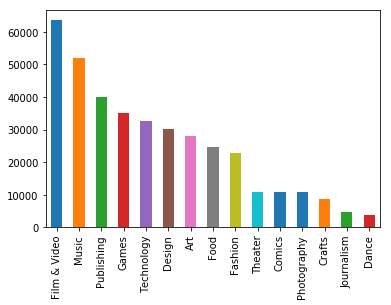

In [10]:
df['main_category'].value_counts().plot(kind='bar')

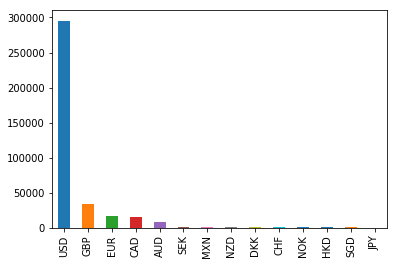

In [11]:
df['currency'].value_counts().plot(kind='bar')

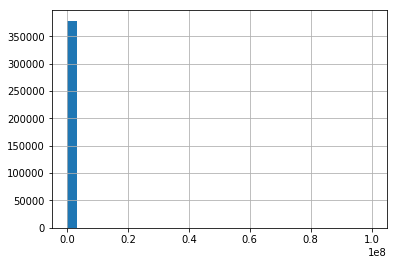

In [12]:
df['goal'].hist(bins=30)

In [13]:
df['goal_log'] = np.log(df['goal'])

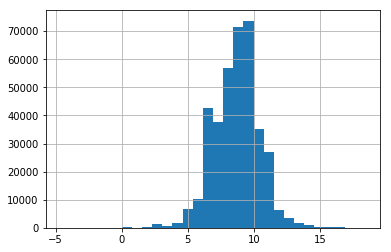

In [14]:
df['goal_log'].hist(bins=30)

In [15]:
df['state'].value_counts()

failed        197716
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1845
Name: state, dtype: int64

In [16]:
newState01 = df['state'].replace(['canceled','suspended'],'failed',inplace=True)

In [17]:
df = df[df.state != 'undefined']

In [18]:
df = df[df.state != 'live']

In [19]:
df['state'].value_counts()

failed        238340
successful    133956
Name: state, dtype: int64

In [20]:
# according to the histogram chart above out[26], the X value less than 2.5 can be divided into the extreme value
df['goal_logmin']= df['goal_log']<=2.5

In [21]:
# the sum of the extreme low value
df['goal_logmin'].sum()

1299

In [22]:
# according to the histogram chart above out[26], the X value more than 14 can be divided into the extreme value
df['goal_logmax']=df['goal_log']>=14

In [23]:
# the sum of the extreme high value
df['goal_logmax'].sum()

1061

In [24]:
df = df[df.goal_log > 2.5]

In [25]:
df = df[df.goal_log < 14]

In [26]:
df.shape

(369936, 18)

In [27]:
df['launched'].head()

0    11/08/2015 12:12
1     02/09/2017 4:43
2     12/01/2013 0:20
3     17/03/2012 3:24
4     04/07/2015 8:35
Name: launched, dtype: object

In [28]:
df['launched']= df.launched.str.slice(0, 11)

In [29]:
df['launched']=pd.to_datetime(df.launched, dayfirst=True)

In [30]:
df['launched'].head()

0   2015-08-11
1   2017-09-02
2   2013-01-12
3   2012-03-17
4   2015-07-04
Name: launched, dtype: datetime64[ns]

In [31]:
df['deadline']=pd.to_datetime(df.deadline, dayfirst=True)

In [32]:
df['deadline'].head()

0   2015-10-09
1   2017-11-01
2   2013-02-26
3   2012-04-16
4   2015-08-29
Name: deadline, dtype: datetime64[ns]

In [33]:
df['launchedYear'] = df.launched.dt.year

In [34]:
df['launchedYear'].head()

0    2015
1    2017
2    2013
3    2012
4    2015
Name: launchedYear, dtype: int64

In [35]:
df['launchedYear'].value_counts()

2015    74241
2014    66274
2016    56330
2017    49232
2013    44742
2012    41091
2011    26192
2010    10505
2009     1320
1970        7
2018        2
Name: launchedYear, dtype: int64

In [36]:
df['launchedMonth'] = df.launched.dt.month

In [37]:
df['launchedMonth'].head()

0    8
1    9
2    1
3    3
4    7
Name: launchedMonth, dtype: int64

In [38]:
df['launchedWeekday'] = df.launched.dt.weekday

In [39]:
df['launchedWeekday'].head()

0    1
1    5
2    5
3    5
4    5
Name: launchedWeekday, dtype: int64

In [40]:
df['campaignDuriation']=df.deadline-df.launched

In [41]:
df['campaignDur'] = df['campaignDuriation'].map(lambda x:x.days)

In [42]:
df.dtypes

KsID                           int64
name                          object
category                      object
main_category                 object
currency                      object
deadline              datetime64[ns]
goal                         float64
launched              datetime64[ns]
pledged                      float64
state                         object
backers                        int64
country                       object
usd pledged                  float64
usd_pledged_real             float64
usd_goal_real                float64
goal_log                     float64
goal_logmin                     bool
goal_logmax                     bool
launchedYear                   int64
launchedMonth                  int64
launchedWeekday                int64
campaignDuriation    timedelta64[ns]
campaignDur                    int64
dtype: object

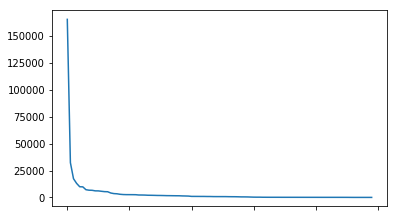

In [43]:
df['campaignDuriation'].value_counts().plot()

In [44]:
df['main_category'].head()

0      Publishing
1    Film & Video
2    Film & Video
3           Music
4    Film & Video
Name: main_category, dtype: object

In [45]:
df.drop(columns=['goal_logmin', 'goal_logmax','pledged', 'usd pledged', 'goal', 'goal_log','campaignDuriation','category', 'currency','pledged', 'country', 'backers', 'name'], inplace=True)

In [46]:
df.dtypes

KsID                         int64
main_category               object
deadline            datetime64[ns]
launched            datetime64[ns]
state                       object
usd_pledged_real           float64
usd_goal_real              float64
launchedYear                 int64
launchedMonth                int64
launchedWeekday              int64
campaignDur                  int64
dtype: object

In [47]:
df.shape

(369936, 11)

In [48]:
df["main_category"].value_counts()

Film & Video    61898
Music           49213
Publishing      38969
Games           34722
Technology      31869
Design          29660
Art             27719
Food            24040
Fashion         22525
Theater         10826
Photography     10688
Comics          10687
Crafts           8689
Journalism       4686
Dance            3745
Name: main_category, dtype: int64

In [49]:
cleanup_main_category = {"main_category": {"Film & Video": 1, "Music": 2, "Publishing": 3, "Games": 4,
                                  "Technology": 5, "Design": 6, "Art":7, "Food":8, "Fashion":9, "Theater":10, "Photography":11,"Comics":12, "Crafts":13,
                                 "Journalism": 14, "Dance": 15}}

In [50]:
df.replace(cleanup_main_category, inplace=True)
df.head()

,KsID,main_category,deadline,launched,state,usd_pledged_real,usd_goal_real,launchedYear,launchedMonth,launchedWeekday,campaignDur
0,1000002330,3,2015-10-09,2015-08-11,failed,0.0,1533.95,2015,8,1,59
1,1000003930,1,2017-11-01,2017-09-02,failed,2421.0,30000.00,2017,9,5,60
2,1000004038,1,2013-02-26,2013-01-12,failed,220.0,45000.00,2013,1,5,45
3,1000007540,2,2012-04-16,2012-03-17,failed,1.0,5000.00,2012,3,5,30
4,1000011046,1,2015-08-29,2015-07-04,failed,1283.0,19500.00,2015,7,5,56


In [51]:
df['state'].value_counts()

failed        236778
successful    133158
Name: state, dtype: int64

In [52]:
cleanup_state = {"state": {"failed": 0, "successful": 1}}

In [53]:
df.replace(cleanup_state, inplace=True)
df.head()

,KsID,main_category,deadline,launched,state,usd_pledged_real,usd_goal_real,launchedYear,launchedMonth,launchedWeekday,campaignDur
0,1000002330,3,2015-10-09,2015-08-11,0,0.0,1533.95,2015,8,1,59
1,1000003930,1,2017-11-01,2017-09-02,0,2421.0,30000.00,2017,9,5,60
2,1000004038,1,2013-02-26,2013-01-12,0,220.0,45000.00,2013,1,5,45
3,1000007540,2,2012-04-16,2012-03-17,0,1.0,5000.00,2012,3,5,30
4,1000011046,1,2015-08-29,2015-07-04,0,1283.0,19500.00,2015,7,5,56


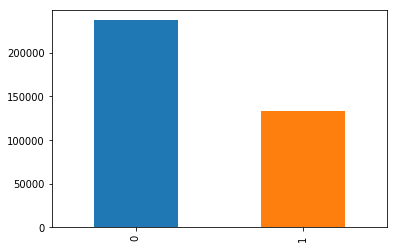

In [54]:
df['state'].value_counts().plot(kind='bar')

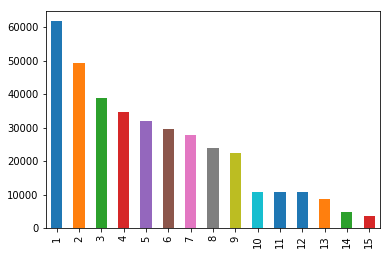

In [55]:
df['main_category'].value_counts().plot(kind='bar')

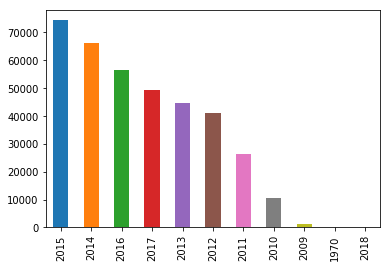

In [56]:
df['launchedYear'].value_counts().plot(kind='bar')

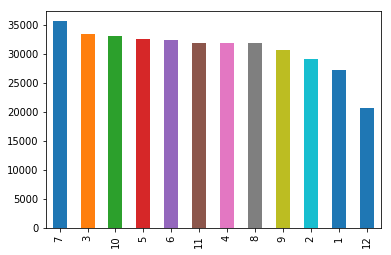

In [57]:
df['launchedMonth'].value_counts().plot(kind='bar')

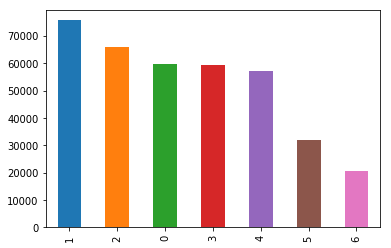

In [58]:
df['launchedWeekday'].value_counts().plot(kind='bar')

In [59]:
df.to_csv('ksprojectsDataPreFinish.csv',index=False)

In [60]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import *
spark = SparkSession.builder.appName('BDAS').getOrCreate()
df = spark.read.csv('ksprojectsDataPreFinish.csv', header=True, inferSchema=True)

In [61]:
df.printSchema()

root
 |-- KsID : integer (nullable = true)
 |-- main_category: integer (nullable = true)
 |-- deadline: timestamp (nullable = true)
 |-- launched: timestamp (nullable = true)
 |-- state: integer (nullable = true)
 |-- usd_pledged_real: double (nullable = true)
 |-- usd_goal_real: double (nullable = true)
 |-- launchedYear: integer (nullable = true)
 |-- launchedMonth: integer (nullable = true)
 |-- launchedWeekday: integer (nullable = true)
 |-- campaignDur: integer (nullable = true)



In [62]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
KsID,369936,1.0747204946409028E9,6.192200552817712E8,5971,2147476221
main_category,369936,5.220659789801479,3.606771077189466,1,15
state,369936,0.3599487478915272,0.4799856972412472,0,1
launchedYear,369936,2014.2167320833873,1.93475564831388,1970,2018
launchedMonth,369936,6.425360062281043,3.3080860659136113,1,12
launchedWeekday,369936,2.4209538947277367,1.7638032838475293,0,6
campaignDur,369936,34.4501778686043,66.64843638081925,1,16739


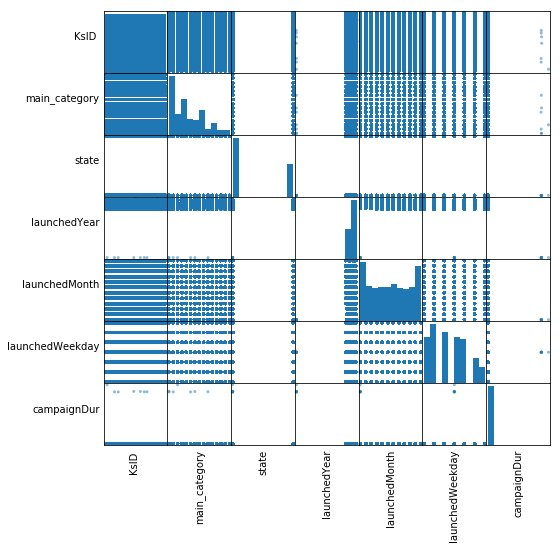

In [63]:
numeric_data = df.select(numeric_features).toPandas()
axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())